In [9]:
import os
from PIL import Image
import torch
from torch import nn
from torchvision import models, utils
from torch.utils.data import Dataset, SubsetRandomSampler, Sampler
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt

from dataset import Fruits
from utils import visualize_samples, predicting_fruit

%matplotlib inline

device = torch.device("cuda:0")

In [1]:
testi = [1, 2, 3, 4]
print([testi[i] for i in range(len(testi))])

[1, 2, 3, 4]


In [1]:
load_folder = "demonstration/"

Fruit_list = {0:'Apple',1:'Banana',2:'Carambola',3:'Guava',
              4:'Kiwi',5:'Mango',6:'Muskmelon',7:'Orange',8:'Peach',
              9:'Pear',10:'Persimmon',11:'Pitaya',12:'Plumу',13:'Pomegranet',14:'Tomato', 15: ' Not a fruit'}

In [4]:
orig_dataset = Fruits(load_folder, production = True)
load_dataset = Fruits(load_folder, 
                       transform=transforms.Compose([
                           transforms.Resize((224, 224)),
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])                         
                       ]), production = True
                      )

load_loader = torch.utils.data.DataLoader(load_dataset, batch_size=1)

In [7]:
model = models.resnet152(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 16)
model.load_state_dict(torch.load('model_saved.sh'))
model = model.to(device)

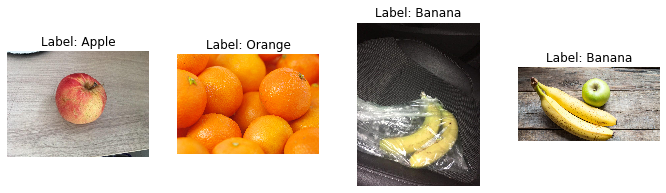

In [8]:
prediction = predicting_fruit(model, folder = '/demostration', title_list = Fruit_list)